<a href="https://colab.research.google.com/github/navneetkrc/Colab_fastai/blob/master/food_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##To cross check if notebook is running on GPU backend

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()
#You should get '/device:GPU:0' if notebook is connected to GPU otherwise you will get ' '

'/device:GPU:0'

#Additional Setup for Google Colab

###Installing Pytorch

In [0]:
!pip install pytorch
!pip install torchtext==0.2.3

###Workaround for an issue with PIL

Please refer this [link](http://forums.fast.ai/t/attributeerror-module-pil-image-has-no-attribute-register-extensions/10689/3) for information related to this issue and workaround.

In [0]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

###Installing fastai

In [0]:
!pip install fastai==0.7.0

###Installing libSM & Jupyter Widgets


The import of fastai is will throw an error that this library is missing. So, Installing the same.

In [0]:
!apt update && apt install -y libsm6 libxext6

Installing Jupyter Notebooks Widgets so that output is loaded on the screen correctly

In [0]:
!pip install notebook = 5.2.0
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [0]:
!mkdir food_img

##Downloading the dataset

In [0]:
!wget --header="Host: public.boxcloud.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" "https://public.boxcloud.com/d/1/b1!ADVahPOlE0czk5yEF32jkFySAO-lUtGJd2OsNhNGp3AZEBN5RuQzDRFXNewyTA_56QCaT9bwd5IY-irlFC1Xirqi1ZTTirycnm3pAZ0CJWdyTtp-XXqB7Be6JNUWFBXrt8cdegqcwzVt0v36OuxilrEdDGBSPwq0D9_H9e1svO-7thHE-AnFO5ZC7k4qImFFrTFUpcvvwzl7FA_uH-7CARNpNJyvrn3yE8WyL8f1-x72Dsj93h2KKW1uD3TCRxry6uCOcpLXZvV8RoAvbV2P0eLCOWHDFoI6e7YHMCNkGnlCTrGUZWdm7AOBa7WVoPezQEfm3d55VZxyFl1oJZB9CitnXaZWEIVo2tsvuY-lyi0p6-2cbDRpX-Hkn3mnnK4R3P-pJ07YtlQiQg09CryQO5takQtKQUIiOD86WiFO6BrjUGzrlQXamy2Bos6bwrIH_o_NlIHNoZ-j40XTEgmxxTGc5aX6FphT0Lnw_TVb4rgjrVAwBlsyrfySeJbMVX2hjC3XEKi7nt8tWQY3Fn7A2NU0z8fE1vDVM8oBTpKIQozVandNzJt3lP8jsji0pdsDwd9vUwATmRZ9pc_2pMTK4VzTQU-9t2b8ByXJfCqtu5KmwzIu_GpMcdLVIKM12dw0fkzyUANUPKGxMOZJo1AqJFkR9WXIX8C03YlabGtCfaaYUl4fp7RlTTN-KqoxspDsxqGCkH6Dr_vlw3Xzg0HjZDIm3WOdYeI71hn6A8sS8Z5CMKSFvUMnwwzdEUm6Kwz5sEvWPTWr9e2NUXGOrvnlPOAbalM9bnhwg5StP94HN8ZG_2tGi_G9fKLPsz5iNj4y4ygvzUu14cmrYwNtf9Ca2V3KRfaHCI5B9f0g7v7qqQMHDIfxogRnX39GpqMHqpNJdIIlGfcHkqx0Nv027BLNwfeFuAjTttoLIDUYQZyZJgvCnIFxZK-dRhbm6MohMoPK9s-bMVL9F20Z0hEyyoOr6ue-mxB3ZouQhQLLs49WPAERRFS7gVVG2wzbIkpoCrnJ7vUFPnhdbuco9z7LaTq82gThsssztF0x5JDJBMJmFiAsqK5jGQOE9zR7UPrsVgToI8TxaCK-82qXw_A2ephjLLcsAJ4tH4km8iT2hS8yLdeANzTzR4C5PsDcNtRwMbB22hL59F4YZe9-MYLvA0ExDAyYl3tqhBwlz-y2p3ETKRA7HBCgvElLH2Z9ajaSMDqc2UD-Ae54HB-e6zPqAkcwqYnUsIh-OkbAcvRhrE2qcitpOKRcWLegmvbkJNw./download" -O "training-data.tar.gz" -c food_img

--2018-11-15 20:10:22--  https://public.boxcloud.com/d/1/b1!ADVahPOlE0czk5yEF32jkFySAO-lUtGJd2OsNhNGp3AZEBN5RuQzDRFXNewyTA_56QCaT9bwd5IY-irlFC1Xirqi1ZTTirycnm3pAZ0CJWdyTtp-XXqB7Be6JNUWFBXrt8cdegqcwzVt0v36OuxilrEdDGBSPwq0D9_H9e1svO-7thHE-AnFO5ZC7k4qImFFrTFUpcvvwzl7FA_uH-7CARNpNJyvrn3yE8WyL8f1-x72Dsj93h2KKW1uD3TCRxry6uCOcpLXZvV8RoAvbV2P0eLCOWHDFoI6e7YHMCNkGnlCTrGUZWdm7AOBa7WVoPezQEfm3d55VZxyFl1oJZB9CitnXaZWEIVo2tsvuY-lyi0p6-2cbDRpX-Hkn3mnnK4R3P-pJ07YtlQiQg09CryQO5takQtKQUIiOD86WiFO6BrjUGzrlQXamy2Bos6bwrIH_o_NlIHNoZ-j40XTEgmxxTGc5aX6FphT0Lnw_TVb4rgjrVAwBlsyrfySeJbMVX2hjC3XEKi7nt8tWQY3Fn7A2NU0z8fE1vDVM8oBTpKIQozVandNzJt3lP8jsji0pdsDwd9vUwATmRZ9pc_2pMTK4VzTQU-9t2b8ByXJfCqtu5KmwzIu_GpMcdLVIKM12dw0fkzyUANUPKGxMOZJo1AqJFkR9WXIX8C03YlabGtCfaaYUl4fp7RlTTN-KqoxspDsxqGCkH6Dr_vlw3Xzg0HjZDIm3WOdYeI71hn6A8sS8Z5CMKSFvUMnwwzdEUm6Kwz5sEvWPTWr9e2NUXGOrvnlPOAbalM9bnhwg5StP94HN8ZG_2tGi_G9fKLPsz5iNj4y4ygvzUu14cmrYwNtf9Ca2V3KRfaHCI5B9f0g7v7qqQMHDIfxogRnX39GpqMHqpNJdIIlGfcHkqx0Nv027BLNwfeFuAjTttoLIDUYQZyZJgvC

In [0]:
!wget --header="Host: public.boxcloud.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" "https://public.boxcloud.com/d/1/b1!OCnXqbYBMjI06YarE4E-fd5EeUr17gBDOtb3-n0hlE53qE4kpc7PPA9clTziiBsxepm137_26z3YkjbjGpwww-sCR-YZTz-YBKAKpYpFnP2cKB3FCEje11__QJrKCMfGDLk54BhZeKzfBZNU1YWmWszKFA0wBbAGIG1L-Pa_zz9DpLUX85KbMb7yHTseqPQvUW8-2mi2Pe9hTz_OzBVS2hDfP1s9R7SUGaUeEy3AEry5rp9I7_1SWtoJ6naHST2Eo2pj8GwYvoIuJ3dpeYfSw6WhnixKEtDQCollP8VjAH9dzjEgiTI7B7XrHxB_nVsR8vX6try6hZ68VmsZCEn_QWqBp-YA7hc3NAGDVjxLu2UTivQeqbtup4T3f87pbPKzKX_--Fe5bJyRK2Jw-5_j-mw9iJtWAJfzKJe9RLcIYjeRDbZzIWiHIb8Od-bq3fYXbFPkWgrbIBJj3vRVvgLEBlBEvUV3QP3zdawNrgZXt-KJJNyWYVJrm0Qt5nQ9GhEDdcttOz8jGX2WoyEVNrRl1wdSw5Tfu3w5cRNV_yG75Q2fB9B0OGpOHmb-DDW79HXv0BfWLL4MZOxE0IuV0l4mx3WRlEcls0P8R-MLBcd4fhXBmnIob1wRvKc6fjSlVSzuO3VDPC9Y57BABUxVwvrYVk83LcWKawaaDH3daR_i-XBe8PwguDHfMgy51dLLTSjw0UEy_mwsEo2dHqDoAeFoCJ81DMLtPJyrEtEcQBnboqxRXDbYIy6BOOouNg2ldun6aCp7Y6GDadOZMQOBuXRJ6O84z9gkrAbJ5zEdr3vc7VsCwIn0UcB90dHFEBEFMsognTizMzMKYoIuQGGiuHalE3pA0MDmeQbEFrgpvSIue6pTwHeuksdhQpsWZBY36uSp0pkQOCq9k0bmK3oUty_TUpM-yyBkk04LAjJz1ge73uMM4kxuyDlPaUvJaN85-UtDjcdWp3ZqLSQ7h7g1lczZavV8HfR-lCPAhKCF2JXpqHJdZnE_WCNWe1Kmuoxz7Njhi6mo1i05FL4kfWaWpInMj4eKD6zR3tO0JEFOj7_Q1x8cA1hkaXXK3l6LN1C81RkVyilUQ4N7I3fYXOqEmYcgqKlHtvisUcxcNn3SzN776NAJ5lDzZ1eZ7MgWhAXjtgstqrlCbOIqRfa4_HVLJ_ofXC2yIoa_4fcdWxUPZPTHoioO-EKvl_mMWkFxstoUDizpiRLS4Q76CiHePjaXuZR8C9D6Rac3i4ilsMn3vgCdTvEGju2EAfQFmmDeczXP4Q../download"  -O "test.tar.gz" -c

--2018-11-15 20:32:15--  https://public.boxcloud.com/d/1/b1!OCnXqbYBMjI06YarE4E-fd5EeUr17gBDOtb3-n0hlE53qE4kpc7PPA9clTziiBsxepm137_26z3YkjbjGpwww-sCR-YZTz-YBKAKpYpFnP2cKB3FCEje11__QJrKCMfGDLk54BhZeKzfBZNU1YWmWszKFA0wBbAGIG1L-Pa_zz9DpLUX85KbMb7yHTseqPQvUW8-2mi2Pe9hTz_OzBVS2hDfP1s9R7SUGaUeEy3AEry5rp9I7_1SWtoJ6naHST2Eo2pj8GwYvoIuJ3dpeYfSw6WhnixKEtDQCollP8VjAH9dzjEgiTI7B7XrHxB_nVsR8vX6try6hZ68VmsZCEn_QWqBp-YA7hc3NAGDVjxLu2UTivQeqbtup4T3f87pbPKzKX_--Fe5bJyRK2Jw-5_j-mw9iJtWAJfzKJe9RLcIYjeRDbZzIWiHIb8Od-bq3fYXbFPkWgrbIBJj3vRVvgLEBlBEvUV3QP3zdawNrgZXt-KJJNyWYVJrm0Qt5nQ9GhEDdcttOz8jGX2WoyEVNrRl1wdSw5Tfu3w5cRNV_yG75Q2fB9B0OGpOHmb-DDW79HXv0BfWLL4MZOxE0IuV0l4mx3WRlEcls0P8R-MLBcd4fhXBmnIob1wRvKc6fjSlVSzuO3VDPC9Y57BABUxVwvrYVk83LcWKawaaDH3daR_i-XBe8PwguDHfMgy51dLLTSjw0UEy_mwsEo2dHqDoAeFoCJ81DMLtPJyrEtEcQBnboqxRXDbYIy6BOOouNg2ldun6aCp7Y6GDadOZMQOBuXRJ6O84z9gkrAbJ5zEdr3vc7VsCwIn0UcB90dHFEBEFMsognTizMzMKYoIuQGGiuHalE3pA0MDmeQbEFrgpvSIue6pTwHeuksdhQpsWZBY36uSp0pkQOCq9k0bmK3oUty_TUpM-yyBkk04LAjJz1ge73uMM

###To explain a little further, tar collected all the files into one package, community_images.tar. The gzip program applied compression, hence the gz extension. So the command does a couple things:

f: this must be the last flag of the command, and the tar file must be immediately after. It tells tar the name and path of the compressed file.

z: tells tar to decompress the archive using gzip

x: tar can collect files or extract them. x does the latter.

v: makes tar talk a lot. Verbose output shows you all the files being extracted.


In [0]:
!tar -xvzf training-data.tar.gz


gzip: stdin: unexpected end of file
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [0]:
!tar -xvzf test1-images.tar.gz -C /food_img
print("done")

### Mounting Google Drive in Colab

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Setting path for google drive

In [0]:
PATH = "gdrive/My\ Drive/FOOD_IMG/"

In [0]:
!ls -lr {PATH}

In [0]:
#!unzip gdrive/My\ Drive/FOOD_IMG/rakuten_train_image.zip -d gdrive/My\ Drive/FOOD_IMG/train_img

### Installing Kaggle Dependencies

In [0]:
#!pip install -U -q kaggle
#!mkdir -p ~/.kaggle
#!echo '{"username":"navneetkrch","key":"4910f3543e9486158ccfa00ca84b274f"}'> ~/.kaggle/kaggle.json  # Replace
#!chmod 600 kaggle.json

In [0]:
#!mkdir -p data 
#!kaggle datasets download -d utsav15/image-food

In [0]:
#!unzip image-food.zip 

In [0]:
#!tar xvf training-data\ \(1\).tar

In [0]:
#!tar xf gdrive/My\ Drive/FOOD_IMAGES_CLASSIFIER/Rakuten-training-data.tar.gz

###Upload train label csv also

In [0]:
#importing fast.ai library
from fastai.imports import *
from fastai.transforms import *
from fastai.torch_imports import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd

In [0]:
PATH = 'training-data'  #set path again for python usage

In [0]:
#read labels for training images in a dataframe using pandas
labels_df=pd.read_csv(f'training-data/train.csv')
labels_df.columns =  ['id', 'label']
labels_df.head()

,1000000965.jpg,40
0,1310005493.jpg,31
1,1050002320.jpg,37
2,1340001721.jpg,33
3,1650001155.jpg,3
4,1170004207.jpg,37


In [0]:
total_rows = labels_df.count
total_rows 

In [0]:
import os
os.listdir(PATH)

['train-images', 'train.csv']

In [0]:
files = os.listdir(f'training-data/train-images')
print(len(files))
files[0:10]


555243


['1070009484.jpg',
 '1400011007.jpg',
 '1750021066.jpg',
 '1200008131.jpg',
 '1370002130.jpg',
 '1430002771.jpg',
 '1080009075.jpg',
 '1070023809.jpg',
 '1220010732.jpg',
 '1700007662.jpg']

In [0]:
test_files = os.listdir(f'test1-images')
print(len(test_files))
test_files[0:10]

118972


['1050003237.jpg',
 '1150006226.jpg',
 '1160011916.jpg',
 '1440007888.jpg',
 '1750020478.jpg',
 '1120003968.jpg',
 '1760013700.jpg',
 '1500013747.jpg',
 '1200006367.jpg',
 '1190001824.jpg']

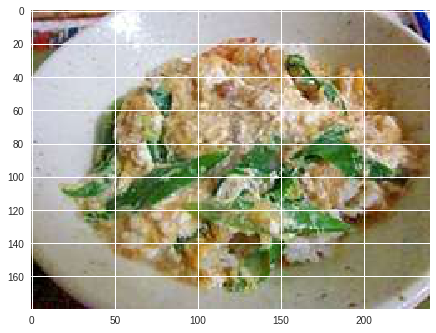

In [0]:
img = plt.imread(f'training-data/train-images/{files[0]}')
plt.imshow(img)

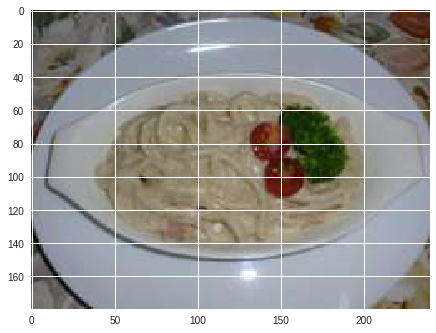

In [0]:
img = plt.imread(f'test1-images/{test_files[0]}')
plt.imshow(img)

In [0]:
labels_csv = f'training-data/train.csv'
n = len(list(open(labels_csv))) - 1
val_idx = get_cv_idxs(n)
print(n)
val_idx.size

554655


110931

In [0]:
#Obtaining dataframe which consists of total count of each bread of dog. each type of food image
dogLabelsAggregated = pd.pivot_table(data=labels_df,index='label',aggfunc=len).sort_values('id',ascending=False)
dogLabelsAggregated

,id
label,
37,127135
33,43691
2,39805
3,37365
13,30485
5,30075
41,26826
28,26737
16,22084


In [0]:
print("Total size",n)
print("Total validation size",val_idx.size)

Total size 554655
Total validation size 110931


##Transfer Learning with Pytorch newly added before transfer learning

### Implementing actual model.

In [0]:
sz=224
arch = resnet50
tmfs = tfms_from_model(arch,sz,aug_tfms=transforms_side_on,max_zoom=1.1)
data = ImageClassifierData.from_csv(path=PATH,folder='training-data/train-images',csv_fname=f'training-data/train.csv',test_name='test1-images',
                                    bs=4,tfms=tmfs,val_idxs = val_idx)
data
learn = ConvLearner.pretrained(arch,data,ps=0.4,precompute=True)
learn.fit(0.01,2)

In [0]:
# accuracy for our pretrained model = 80.6751
# Now lets find suitable LR using CLR and SGDR.
lrf = learn.lr_find()

In [0]:
learn.sched.plot_lr()

In [0]:
learn.sched.plot()

In [0]:
#Now lets use different learning rate i.e. 1e-03
learn.fit(1e-3,6)

In [0]:
learn.precompute = False

In [0]:
learn.fit(1e-3,3,cycle_len=1)

In [0]:
learn.sched.plot_lr()

In [0]:
learn.save('224_lastlayer_dogBreedIden')

In [0]:
learn.load('224_lastlayer_dogBreedIden')

### Fine tuning and differential learning rate 

In [0]:
learn.unfreeze()

In [0]:
lr = np.array([1e-10,1e-5,1e-3])

In [0]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

### Visualizing the data

In [0]:
data.val_y

In [0]:
data.classes

In [0]:
learn.sched.plot_lr()

In [0]:
logs_preds = learn.predict()

In [0]:
logs_preds.shape

# Transfer learning in kernels with PyTorch

Following the same strategy from Beluga's kernel [Use pretrained Keras models](https://www.kaggle.com/gaborfodor/use-pretrained-keras-models-lb-0-3), this kernel uses a dataset with PyTorch pretrained networks weights. 

Training in the CPU is quite slow, but it is still feasible to use a pre-trained network, replace the final layer and train just this last layer. 

Thanks Beluga for your great kernel. This one uses not only the concept but also a lot of the code. 

In [0]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
import torch
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, datasets, models

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
np.random.seed(0)

This [dataset](https://www.kaggle.com/pvlima/pretrained-pytorch-models) has the PyTorch weights for some pre-trained networks.

We have to copy the pretrained models to the cache directory (~/.torch/models) where PyTorch is looking for them.

In [0]:
!ls ../input/pretrained-pytorch-models/

In [0]:
cache_dir = expanduser(join('~', '.torch'))
if not exists(cache_dir):
    makedirs(cache_dir)
models_dir = join(cache_dir, 'models')
if not exists(models_dir):
    makedirs(models_dir)

In [0]:
!cp ../input/pretrained-pytorch-models/* ~/.torch/models/

In [0]:
!ls ~/.torch/models

In [0]:
!ls ../input/dog-breed-identification

Using just 16 most frequent breeds to keep the running time under the kernel limit

In [0]:
INPUT_SIZE = 224
NUM_CLASSES = 16
data_dir = '../input/dog-breed-identification/'
labels = pd.read_csv(join(data_dir, 'labels.csv'))
sample_submission = pd.read_csv(join(data_dir, 'sample_submission.csv'))
print(len(listdir(join(data_dir, 'train'))), len(labels))
print(len(listdir(join(data_dir, 'test'))), len(sample_submission))

In [0]:
selected_breed_list = list(labels.groupby('breed').count().sort_values(by='id', ascending=False).head(NUM_CLASSES).index)
labels = labels[labels['breed'].isin(selected_breed_list)]
labels['target'] = 1
labels['rank'] = labels.groupby('breed').rank()['id']
labels_pivot = labels.pivot('id', 'breed', 'target').reset_index().fillna(0)

train = labels_pivot.sample(frac=0.8)
valid = labels_pivot[~labels_pivot['id'].isin(train['id'])]
print(train.shape, valid.shape)

In [0]:
class DogsDataset(Dataset):
    def __init__(self, labels, root_dir, subset=False, transform=None):
        self.labels = labels
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        img_name = '{}.jpg'.format(self.labels.iloc[idx, 0])
        fullname = join(self.root_dir, img_name)
        image = Image.open(fullname)
        labels = self.labels.iloc[idx, 1:].as_matrix().astype('float')
        labels = np.argmax(labels)
        if self.transform:
            image = self.transform(image)
        return [image, labels]

In [0]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
ds_trans = transforms.Compose([transforms.Scale(224),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               normalize])
train_ds = DogsDataset(train, data_dir+'train/', transform=ds_trans)
valid_ds = DogsDataset(valid, data_dir+'train/', transform=ds_trans)

train_dl = DataLoader(train_ds, batch_size=4, shuffle=True, num_workers=4)
valid_dl = DataLoader(valid_ds, batch_size=4, shuffle=True, num_workers=4)

In [0]:
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    axis.imshow(inp)

In [0]:
img, label = next(iter(train_dl))
print(img.size(), label.size())
fig = plt.figure(1, figsize=(16, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 4), axes_pad=0.05)    
for i in range(img.size()[0]):
    ax = grid[i]
    imshow(ax, img[i])

# ResNet50

### Just try the model 

In [0]:
use_gpu = torch.cuda.is_available()
resnet = models.resnet50(pretrained=True)
inputs, labels = next(iter(train_dl))
if use_gpu:
    resnet = resnet.cuda()
    inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())   
else:
    inputs, labels = Variable(inputs), Variable(labels)
outputs = resnet(inputs)
outputs.size()

The model seems to work OK. Resnet outputs probabilities for the imagenet 1000 labels as expected. 

### Replace last layer and train

Will replace the last layer with one that predicts the 16 classes. The network weights will be fixed expected for the last layer that is trained.

In [0]:
def train_model(dataloders, model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    use_gpu = torch.cuda.is_available()
    best_model_wts = model.state_dict()
    best_acc = 0.0
    dataset_sizes = {'train': len(dataloders['train'].dataset), 
                     'valid': len(dataloders['valid'].dataset)}

    for epoch in range(num_epochs):
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train(True)
            else:
                model.train(False)

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloders[phase]:
                if use_gpu:
                    inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                optimizer.zero_grad()

                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                running_loss += loss.data[0]
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == 'train':
                train_epoch_loss = running_loss / dataset_sizes[phase]
                train_epoch_acc = running_corrects / dataset_sizes[phase]
            else:
                valid_epoch_loss = running_loss / dataset_sizes[phase]
                valid_epoch_acc = running_corrects / dataset_sizes[phase]
                
            if phase == 'valid' and valid_epoch_acc > best_acc:
                best_acc = valid_epoch_acc
                best_model_wts = model.state_dict()

        print('Epoch [{}/{}] train loss: {:.4f} acc: {:.4f} ' 
              'valid loss: {:.4f} acc: {:.4f}'.format(
                epoch, num_epochs - 1,
                train_epoch_loss, train_epoch_acc, 
                valid_epoch_loss, valid_epoch_acc))
            
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [0]:
resnet = models.resnet50(pretrained=True)
# freeze all model parameters
for param in resnet.parameters():
    param.requires_grad = False

# new final layer with 16 classes
num_ftrs = resnet.fc.in_features
resnet.fc = torch.nn.Linear(num_ftrs, 16)
if use_gpu:
    resnet = resnet.cuda()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(resnet.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

dloaders = {'train':train_dl, 'valid':valid_dl}

In [0]:
start_time = time.time()
model = train_model(dloaders, resnet, criterion, optimizer, exp_lr_scheduler, num_epochs=2)
print('Training time: {:10f} minutes'.format((time.time()-start_time)/60))

In [0]:
def visualize_model(dataloders, model, num_images=16):
    cnt = 0
    fig = plt.figure(1, figsize=(16, 16))
    grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.05)
    for i, (inputs, labels) in enumerate(dataloders['valid']):
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        for j in range(inputs.size()[0]):
            ax = grid[cnt]
            imshow(ax, inputs.cpu().data[j])
            ax.text(10, 210, '{}/{}'.format(preds[j], labels.data[j]), 
                    color='k', backgroundcolor='w', alpha=0.8)
            cnt += 1
            if cnt == num_images:
                return

In [0]:
visualize_model(dloaders, resnet)

This kernel was mainly to test using transfer learning in kernels using PyTorch. Training is slow in CPU but it works.   